<a href="https://colab.research.google.com/github/Manika6/Machine-Learning-Colab/blob/master/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#IMPORTS
from keras.layers import Lambda, Input, Dense
from keras.models import Model
import random
import numpy as np
from keras import backend as K
from keras import losses

from tqdm import tqdm
import matplotlib.pyplot as plt


In [0]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_train=X_train/255.0

In [0]:
#Defining all the variables
image_size = 784
iterations = 400

lr = 0.1
batch_size = 1000

intermediate_dim = 256
latent_dim = 2

In [0]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch_size, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [7]:
x = Input(shape=(image_size,))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

In [0]:
# encoder, from inputs to latent space
encoder = Model(x, [z_mean, z_log_sigma, z])

In [0]:
encoded = Input(shape=(2,))
y = Dense(256, activation='relu')(encoded)
y = Dense(784, activation='sigmoid')(y)

decoder = Model(encoded, y)
outputs = decoder(encoder(x)[2])

vae = Model(x, outputs)

In [0]:
reconstruction_loss = losses.binary_crossentropy(x, outputs)
reconstruction_loss *= image_size
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)


vae.add_loss(vae_loss)
vae.compile(optimizer='adadelta')

In [12]:
vae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
model_1 (Model)              [(None, 2), (None, 2), (N 201988    
_________________________________________________________________
model_2 (Model)              (None, 784)               202256    
Total params: 404,244
Trainable params: 404,244
Non-trainable params: 0
_________________________________________________________________


In [13]:
vae.fit(X_train,
        epochs=iterations,
        batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/400
60000/60000 [==============================] - 4s 68us/step - loss: 265.2183
Epoch 2/400
60000/60000 [==============================] - 1s 18us/step - loss: 203.3999
Epoch 3/400
60000/60000 [==============================] - 1s 19us/step - loss: 192.5002
Epoch 4/400
60000/60000 [==============================] - 1s 19us/step - loss: 186.7610
Epoch 5/400
60000/60000 [==============================] - 1s 18us/step - loss: 181.4950
Epoch 6/400
60000/60000 [==============================] - 1s 19us/step - loss: 176.3020
Epoch 7/400
60000/60000 [==============================] - 1s 19us/step - loss: 172.9611
Epoch 8/400
60000/60000 [==============================] - 1s 18us/step - loss: 170.7409
Epoch 9/400
60000/60000 [==============================] - 1s 19us/step - loss: 169.4174
Epoch 10/400
60000/60000 [==============================] - 1s 18us/step - loss: 168.0731
Epoch 11/400
60000/60000 [==============================] - 1

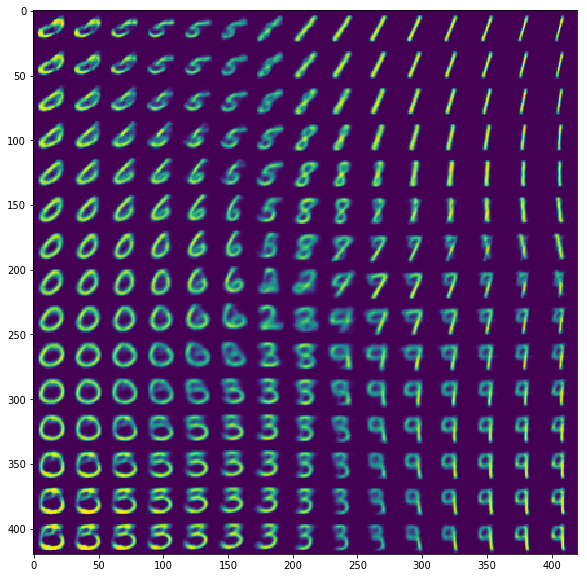

In [14]:
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# we will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-3, 3, n)
grid_y = np.linspace(-3, 3, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]]) 
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

# *References*

1.   https://keras.io/examples/variational_autoencoder/
2.   https://keras.io/getting-started/sequential-model-guide/
3.  https://blog.keras.io/building-autoencoders-in-keras.html

